In [0]:
import pandas as pd
import numpy as np

In [0]:
import xlrd

In [0]:
loc = ("/content/CRY - EndNov2018_Send_Copy.xlsx") 
  
# To open Workbook 
wb = xlrd.open_workbook(loc)

sheet = wb.sheet_by_index(0) 
  
# For row 0 and column 0 
sheet.cell_value(0, 0) 

In [0]:
Cry= pd.read_excel("/content/CRY - EndNov2018_Send_Copy.xlsx")

In [0]:
Cry.head()

In [0]:
xls = pd.ExcelFile('/content/CRY - EndNov2018_Send_Copy.xlsx')

# Now you can list all sheets in the file
a= xls.sheet_names



df = pd.read_excel(xls, sheetname=a[2])




In [0]:
df.head()

In [0]:
df=pd.read_excel(xls,sheetname=a[4])

In [0]:
df.head()

In [0]:
Slice=df.iloc[:,1:4]

In [0]:
Slice.dropna(inplace=True)

In [0]:
Slice

In [0]:
Slice.columns=["Quarter","Dates","Sales"]
Slice

In [0]:
CRY=Slice[["Dates","Sales"]]
CRY.head()

In [0]:
CRY.index=[i for i in range(len(CRY.values))]

In [0]:

CRY.head()

In [0]:
CRY.to_csv("new.csv",index=False)

In [0]:
data = pd.read_csv('new.csv', parse_dates=['Dates'], index_col='Dates')

In [0]:
data.index

In [0]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
!pip install statsmodels


In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose



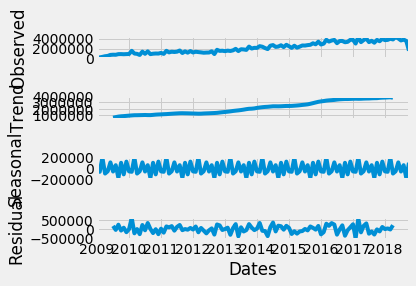

<Figure size 14400x3600 with 0 Axes>

In [27]:
decomp = seasonal_decompose(data,model="additive")
fig=decomp.plot()
plt.figure(figsize=(200,50))
plt.show()

<Figure size 14400x14400 with 0 Axes>

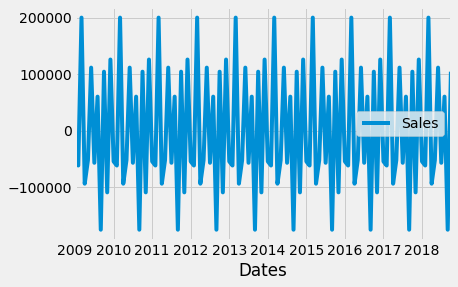

In [31]:
seasonal = decomp.seasonal
plt.figure(figsize=(200,200))
fig= seasonal.plot()
plt.show()

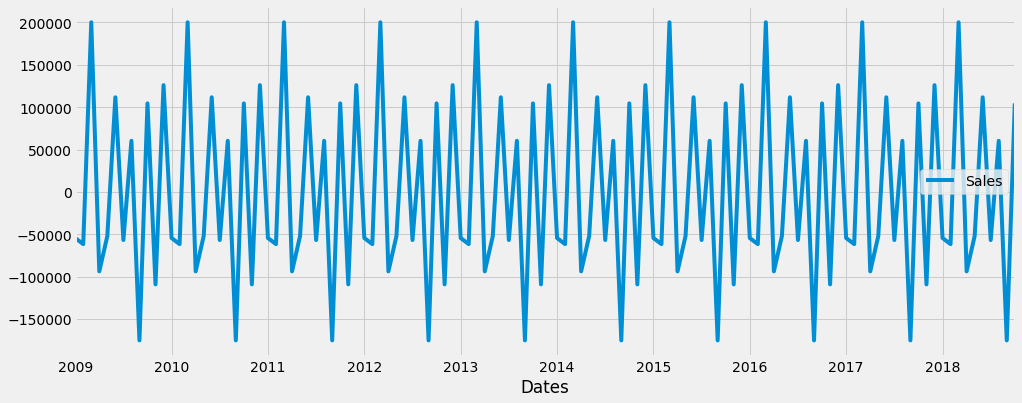

In [32]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

fig= seasonal.plot()
plt.show()

In [0]:
!pip install statsmodels --upgrade

In [42]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        
            mod = statsmodels.api.tsa.statespace.SARIMAX(data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        
            

AttributeError: ignored